<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_Boids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import HTML
%matplotlib inline

In [ ]:
boid_count = 10

In [ ]:
limits = np.array([2000, 2000])

In [ ]:
positions = np.random.rand(2, boid_count) * limits[:, None]

In [ ]:
def new_flock(count, lower_limits, upper_limits):
    return (lower_limits[:, None] + np.random.rand(2, count) * (upper_limits - lower_limits)[:, None])

In [ ]:
velocities = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))

In [ ]:
positions += velocities

In [ ]:
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

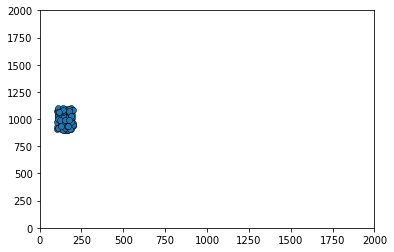

In [ ]:
figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :], marker='o', edgecolor='k', lw=0.5)

In [ ]:
def update_boids(positions, velocities):
    positions += velocities

In [ ]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [ ]:
anim = animation.FuncAnimation(figure, animate, frames=50, interval=50)

In [ ]:
# anim.save('boids_1.mp4')

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
positions = new_flock(4, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(4, np.array([0, -20]), np.array([10, 20]))

In [ ]:
middle = np.mean(positions, 1)

In [ ]:
direction_to_middle = positions - middle[:, None]

In [ ]:
move_to_middle_strength = 0.01
velocities = velocities - direction_to_middle * move_to_middle_strength

In [ ]:
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, None]
    velocities -= direction_to_middle * move_to_middle_strength
    positions += velocities

In [ ]:
anim = animation.FuncAnimation(figure, animate, frames=50, interval=50)

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
separations = positions[:, None, :] - positions[:, :, None]

In [ ]:
positions

array([[518.10696303, 507.42525886, 543.42578713, 522.05118289],
       [409.28506003, 333.28722366, 523.58574887, 513.97179302]])

In [ ]:
positions[:, None, :]

array([[[518.10696303, 507.42525886, 543.42578713, 522.05118289]],

       [[409.28506003, 333.28722366, 523.58574887, 513.97179302]]])

In [ ]:
positions[:, :, None]

array([[[518.10696303],
        [507.42525886],
        [543.42578713],
        [522.05118289]],

       [[409.28506003],
        [333.28722366],
        [523.58574887],
        [513.97179302]]])

In [ ]:
np.arange(10,)[:,None]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
np.arange(10,)[None,:]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [ ]:
np.arange(10,)[None,:]-np.arange(10,)[:,None]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [-1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7],
       [-3, -2, -1,  0,  1,  2,  3,  4,  5,  6],
       [-4, -3, -2, -1,  0,  1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-6, -5, -4, -3, -2, -1,  0,  1,  2,  3],
       [-7, -6, -5, -4, -3, -2, -1,  0,  1,  2],
       [-8, -7, -6, -5, -4, -3, -2, -1,  0,  1],
       [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0]])

In [ ]:
separations

array([[[   0.        ,  -10.68170416,   25.3188241 ,    3.94421986],
        [  10.68170416,    0.        ,   36.00052826,   14.62592402],
        [ -25.3188241 ,  -36.00052826,    0.        ,  -21.37460424],
        [  -3.94421986,  -14.62592402,   21.37460424,    0.        ]],

       [[   0.        ,  -75.99783637,  114.30068884,  104.68673299],
        [  75.99783637,    0.        ,  190.29852521,  180.68456936],
        [-114.30068884, -190.29852521,    0.        ,   -9.61395585],
        [-104.68673299, -180.68456936,    9.61395585,    0.        ]]])

In [ ]:
squared_displacements = separations * separations

In [ ]:
square_distances = np.sum(squared_displacements, 0)

In [ ]:
square_distances

array([[    0.        ,  5889.76993669, 13705.690322  , 10974.86893416],
       [ 5889.76993669,     0.        , 37509.56673037, 32860.8312577 ],
       [13705.690322  , 37509.56673037,     0.        ,   549.3018534 ],
       [10974.86893416, 32860.8312577 ,   549.3018534 ,     0.        ]])

In [ ]:
alert_distance = 2000
close_birds = square_distances < alert_distance

In [ ]:
separations_if_close = np.copy(separations)
far_away = np.logical_not(close_birds)

In [ ]:
separations_if_close[0, :, :][far_away] = 0
separations_if_close[1, :, :][far_away] = 0

In [ ]:
separations_if_close[0, :, :]

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , -21.37460424],
       [  0.        ,   0.        ,  21.37460424,   0.        ]])

In [ ]:
far_away

array([[False,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True, False, False],
       [ True,  True, False, False]])

In [ ]:
velocities = velocities + np.sum(separations_if_close, 2)

In [ ]:
velocities

array([[  9.16557529,   8.07648271, -13.93911461,  24.03640084],
       [ -3.59415236, -17.26832285, -19.15808882,  -3.27044695]])

In [ ]:
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, None]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, None, :] - positions[:, :, None]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    positions += velocities

In [ ]:
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

In [ ]:
anim = animation.FuncAnimation(figure, animate,frames=50, interval=50)
HTML(anim.to_jshtml())

In [ ]:
formation_flying_distance = 10000
formation_flying_strength = 0.125
move_to_middle_strength = 0.01
alert_distance = 100

In [ ]:
def update_boids(positions, velocities):

    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, None]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, None, :] - positions[:, :, None]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    velocity_differences = velocities[:, None, :] - velocities[:, :, None]

    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

    positions += velocities

In [ ]:
positions = new_flock(4, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(4, np.array([0, -20]), np.array([10, 20]))

In [ ]:
anim = animation.FuncAnimation(figure, animate, frames=200, interval=50)
HTML(anim.to_jshtml())

In [ ]:
def update_boids(positions, velocities):

    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, None]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, None, :] - positions[:, :, None]
    squared_displacements = separations **2
    square_distances = np.sum(squared_displacements, 0)
    
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    velocity_differences = velocities[:, None, :] - velocities[:, :, None]

    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

    positions += velocities

In [ ]:
positions = new_flock(4, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(4, np.array([0, -20]), np.array([10, 20]))

In [ ]:
anim = animation.FuncAnimation(figure, animate, frames=200, interval=50)
HTML(anim.to_jshtml())